In [93]:
import pandas as pd
import numpy as np

In [102]:
# load dfc
dfc = pd.read_csv('/home/ruairi/data/tmp/classified_clustered_merge.csv')


# load perfection
perf = pd.read_csv('/home/ruairi/data/tmp/perfection_talk.csv')


/home/ruairi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [103]:
perf = perf[['neuron_id', 'response', 
             'treatment', 'virus', 
             'group_id', 'pretreatment']]


In [104]:
# merge
df = pd.merge(how='inner', left=dfc, right=perf, on='neuron_id').drop_duplicates()
df = df[['neuron_id', 'response', 
         'treatment', 'virus', 'label',
         'group_id', 'pretreatment']]
#df['response'] = df['response'].fillna('excluded')

In [105]:
dfs = df[(df['group_id'].isin([1,2]))]
df_out2 = dfs.pivot_table(index='treatment',
                          columns='label', 
                          aggfunc='count')['neuron_id']
totals = df_out2.sum(1).values
df_out2 = np.round(df_out2.div(df_out2.sum(1), 0), 3) * 100
df_out2['Total Neurons'] = totals
df_out2

label,p 5-HT,p GABA,p Non-5-HT,Total Neurons
treatment,,,,
CIT,30.8,29.0,40.2,107
SAL,37.8,14.6,47.6,82


In [106]:
dfs = df[(df['group_id'].isin([3,4]))]
df_out2 = dfs.pivot_table(index='pretreatment',
                          columns='label', 
                          aggfunc='count')['neuron_id']
totals = df_out2.sum(1).values
df_out2 = np.round(df_out2.div(df_out2.sum(1), 0), 3) * 100
df_out2['Total Neurons'] = totals
df_out2

label,p 5-HT,p GABA,p Non-5-HT,Total Neurons
pretreatment,,,,
CIT,37.9,25.8,36.4,66
SAL,26.3,15.8,57.9,38


### Citalopram

In [107]:
dfs = df[(df['group_id'].isin([1,2]))& 
         (df['response']!= 'excluded')]
df_out2 = dfs.pivot_table(index=['label', 'treatment'], 
                          columns='response', 
                          aggfunc='count')['neuron_id']
totals = df_out2.sum(1).values
df_out2 = np.round(df_out2.div(df_out2.sum(1), 0), 3) * 100
df_out2['Total Neurons'] = totals
df_out2

response              decrease  increase  no effect  Total Neurons
label      treatment                                              
p 5-HT     CIT            52.6      10.5       36.8           19.0
           SAL             NaN       3.7       96.3           27.0
p GABA     CIT            46.7      16.7       36.7           30.0
           SAL             NaN      25.0       75.0           12.0
p Non-5-HT CIT            54.8      19.4       25.8           31.0
           SAL             NaN      10.7       89.3           28.0

In [108]:
dfs = df[(df['group_id'].isin([3,4])) & 
         (df['response']!= 'excluded')]
df_out2 = dfs.pivot_table(index=['label', 'pretreatment'], 
                          columns='response', 
                          aggfunc='count')['neuron_id']
totals = df_out2.sum(1).values
df_out2 = np.round(df_out2.div(df_out2.sum(1), 0), 3) * 100
df_out2['Total Neurons'] = totals
df_out2

response                 decrease  increase  no effect  Total Neurons
label      pretreatment                                              
p 5-HT     CIT                NaN       NaN      100.0           12.0
           SAL               40.0       NaN       60.0            5.0
p GABA     CIT                NaN       NaN      100.0           15.0
           SAL               20.0       NaN       80.0            5.0
p Non-5-HT CIT               18.2       9.1       72.7           11.0
           SAL               28.6       NaN       71.4            7.0

### BARS

In [101]:
acute = df[(df['group_id'].isin([1,2, 3, 4])) & 
         (df['response']!= 'excluded')]

In [32]:
import matplotlib.pyplot as plt

In [33]:
df1 = acute[acute['response']=='decrease']
dfp = df1.groupby(['label', 'treatment']).size().reset_index().pivot(columns='label',
                                                                    index='treatment', 
                                                                    values=0).fillna(0)
dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)

In [12]:
pal2 = ['#c44e52','#55a868',  '#4c72b0', '#dd8452']

In [13]:
acute.groupby('response').apply(lambda x: len(x)/len(acute) * 100)

response
decrease     55.675676
increase     24.864865
no effect    19.459459
dtype: float64

Text(0.5,0,'Treatment')

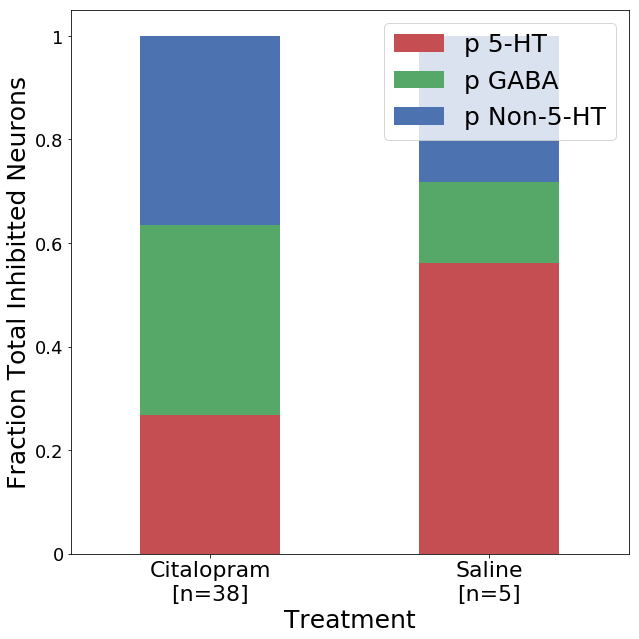

In [14]:
#save_dir = '/media/ruairi/UBUNTU/figures/frac_bars'
f, a = plt.subplots(figsize=(10, 10))

dfp.reset_index().plot(x='treatment', 
                       kind='bar', 
                       stacked=True, 
                       color=pal2, ax=a)


a.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontdict={'fontsize':18})
a.set_xticklabels(['Citalopram\n[n=38]', 'Saline\n[n=5]'], 
                  fontdict={'fontsize':22},
                 rotation=0)
a.legend(loc=1, prop={'size':25})
a.set_ylabel('Fraction Total Inhibitted Neurons', fontdict={'fontsize': 25})

a.set_xlabel('Treatment', fontdict={'fontsize': 25})
# plt.savefig(os.path.join(save_dir, 'cit.png'), dpi=300)

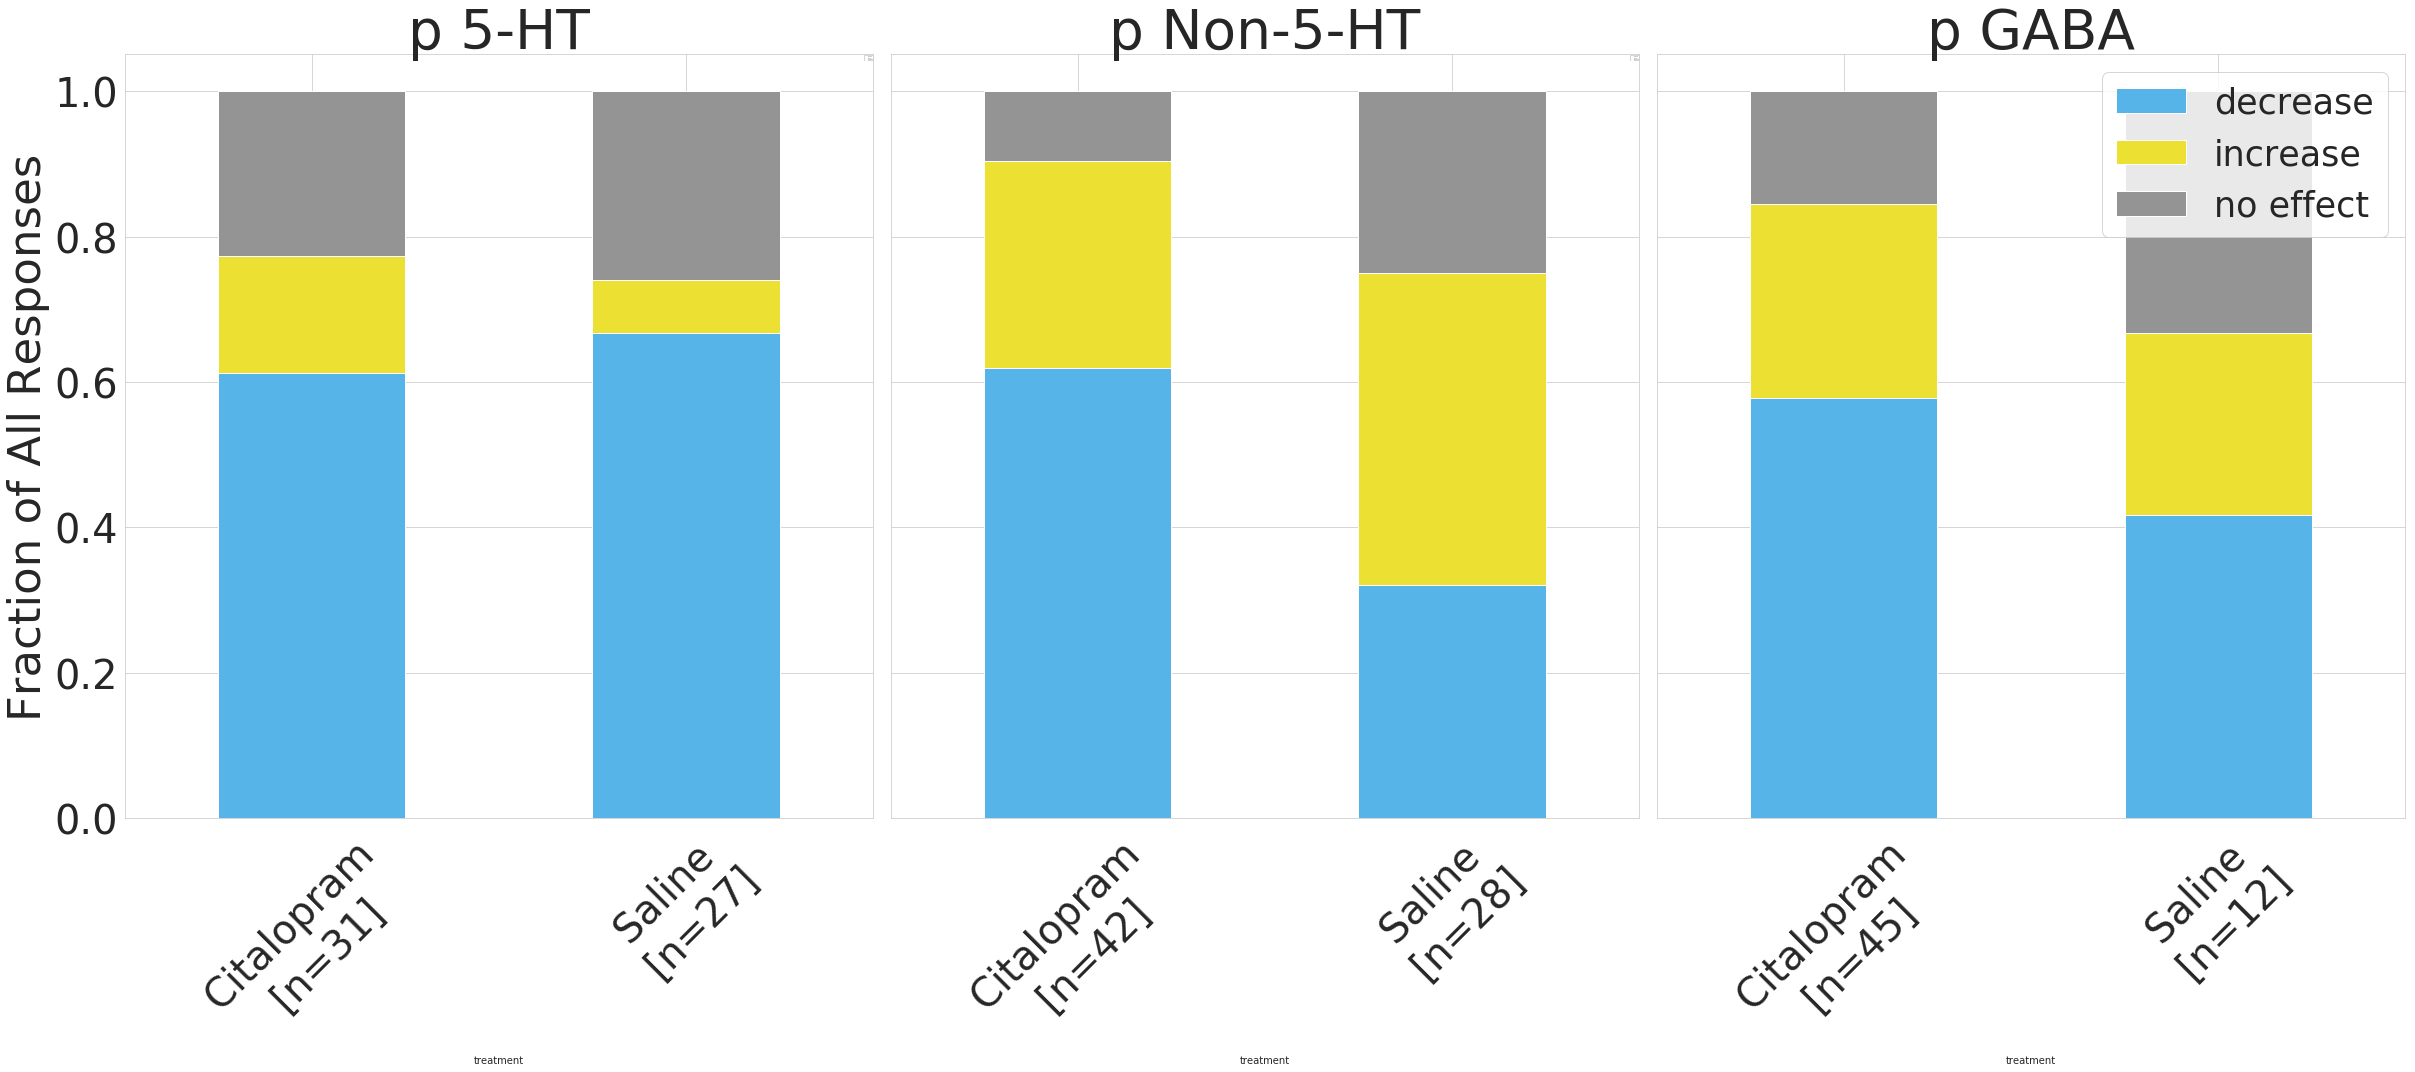

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_style('whitegrid')
save_dir = '/media/ruairi/UBUNTU/figures/bars'
exp= 'CIT_WAY'

f, ax = plt.subplots(ncols=3, figsize=(33, 15), sharey=True)

for i, cat in enumerate(acute['label'].unique()):
    a = ax[i]

    cmap = sns.color_palette('colorblind', n_colors=10)[::-1]

    df1 = acute[acute['label']==cat]
    dfp = df1.groupby(['response', 'treatment']).size().reset_index().pivot(columns='response',
                                                                    index='treatment', 
                                                                    values=0).fillna(0)
    sums = dfp.apply(np.sum, axis=1).values
    dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)
    dfp.reset_index().plot(x='treatment', kind='bar', stacked=True, 
                               color=cmap, ax=a)
    a.set_title(cat, fontdict={'fontsize': 55})
    
    a.set_xticklabels([f'Citalopram \n[n={int(sums[0])}]', f'Saline \n[n={int(sums[1])}]'],
                     rotation=45)
    a.legend(loc=0, prop={'size':0.00001})

    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(40)
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(40)
plt.tight_layout()
ax[-1].legend(loc=0, prop={'size':35})
ax[0].set_ylabel('Fraction of All Responses', {'fontsize': 45})
plt.savefig('/home/ruairi/data/figures/talk/acute.png', dpi=300)

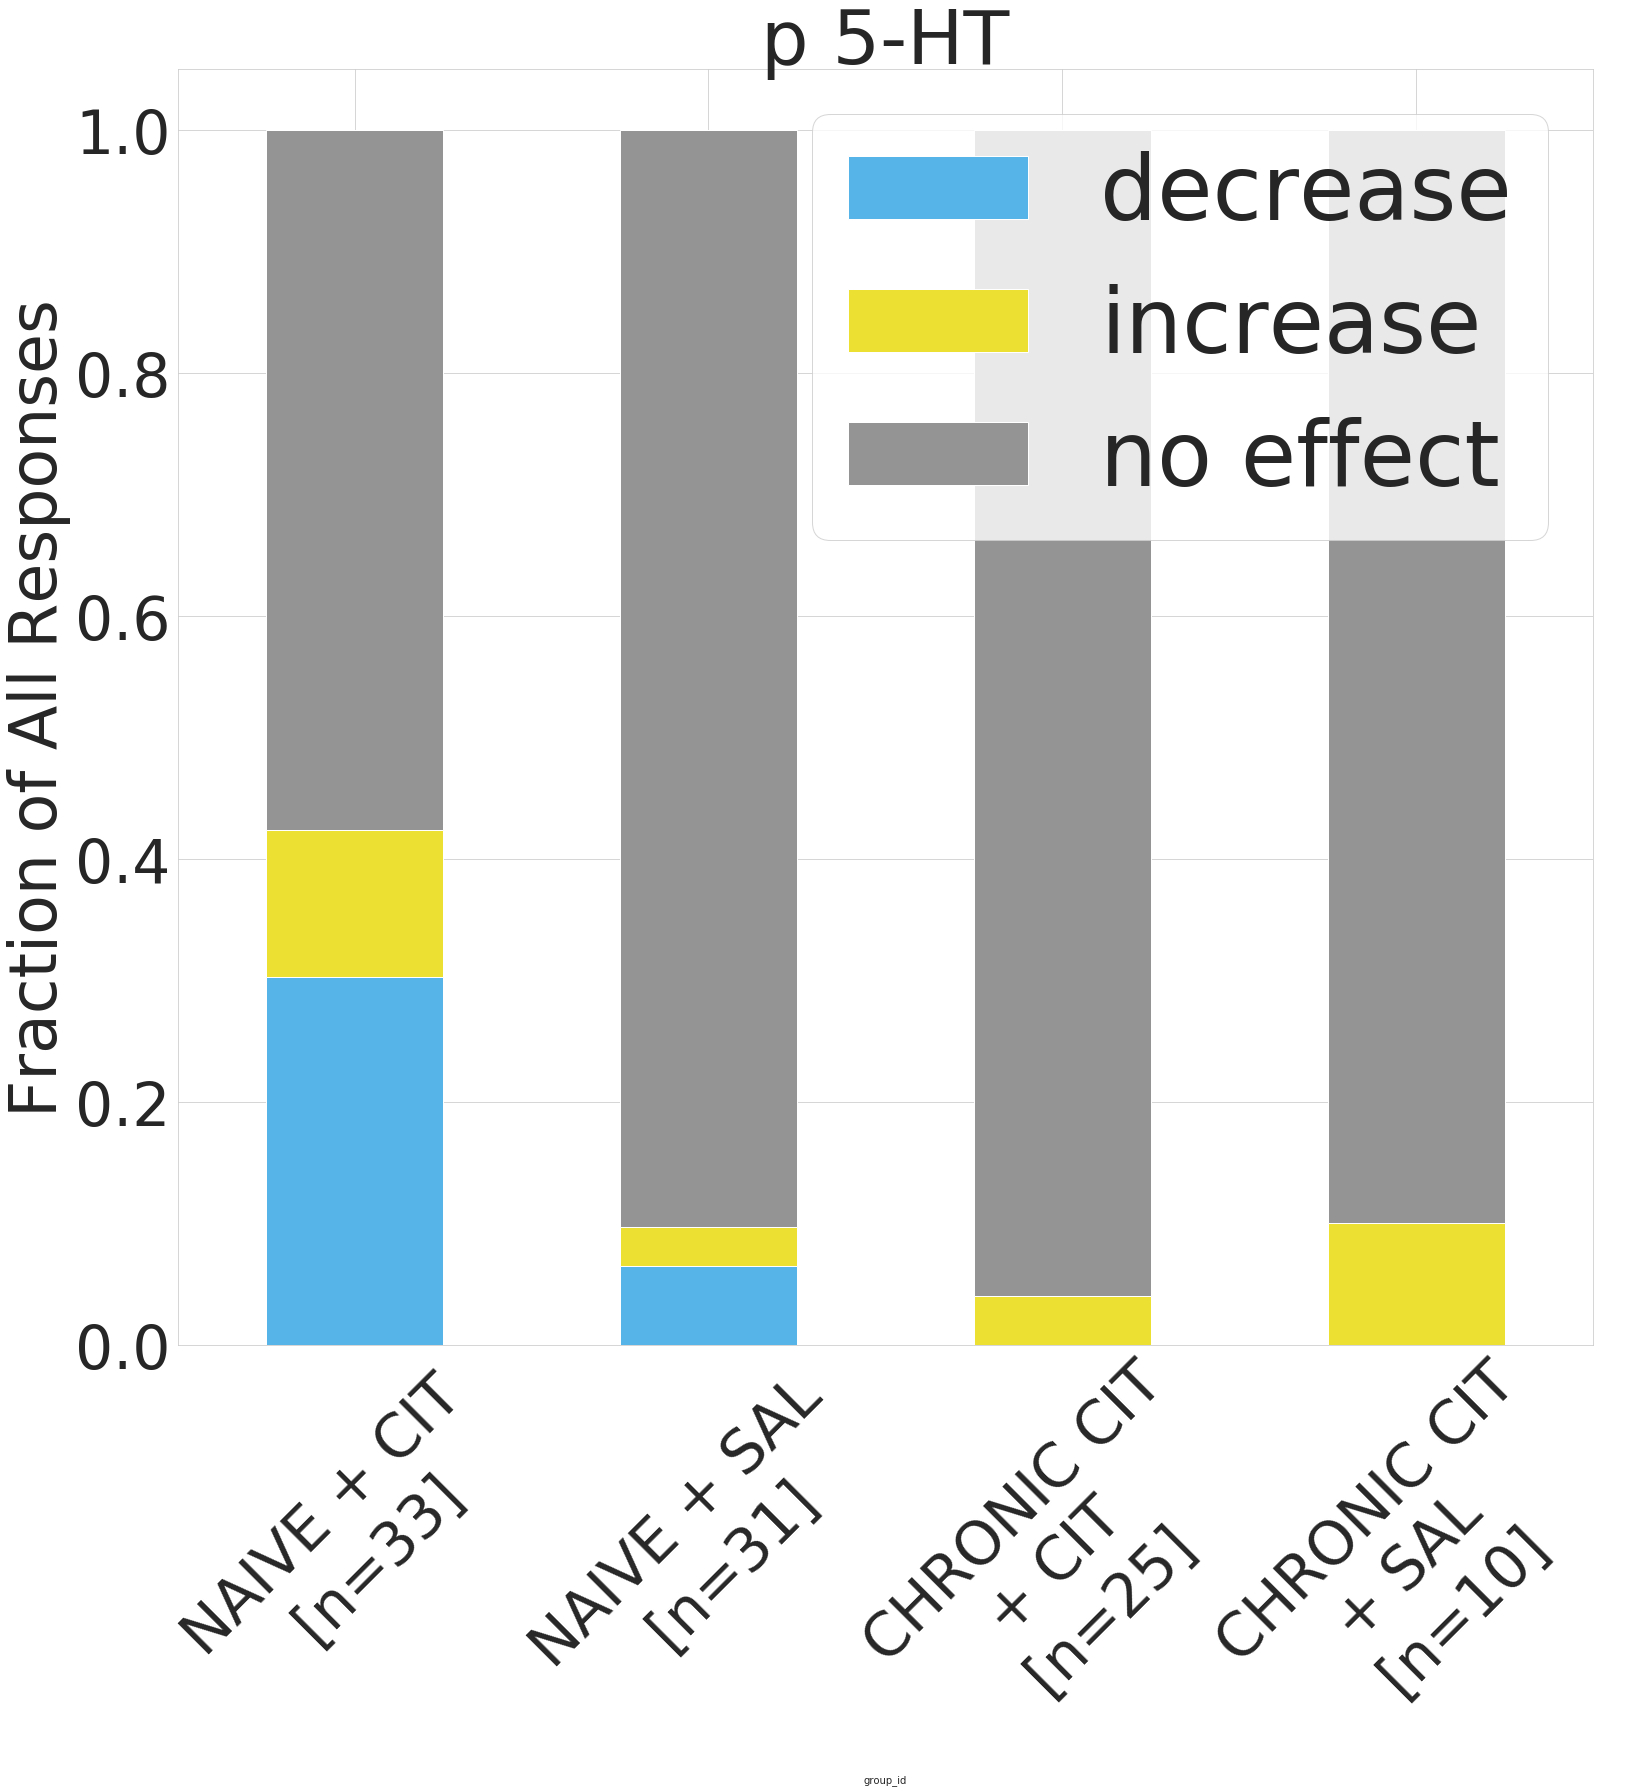

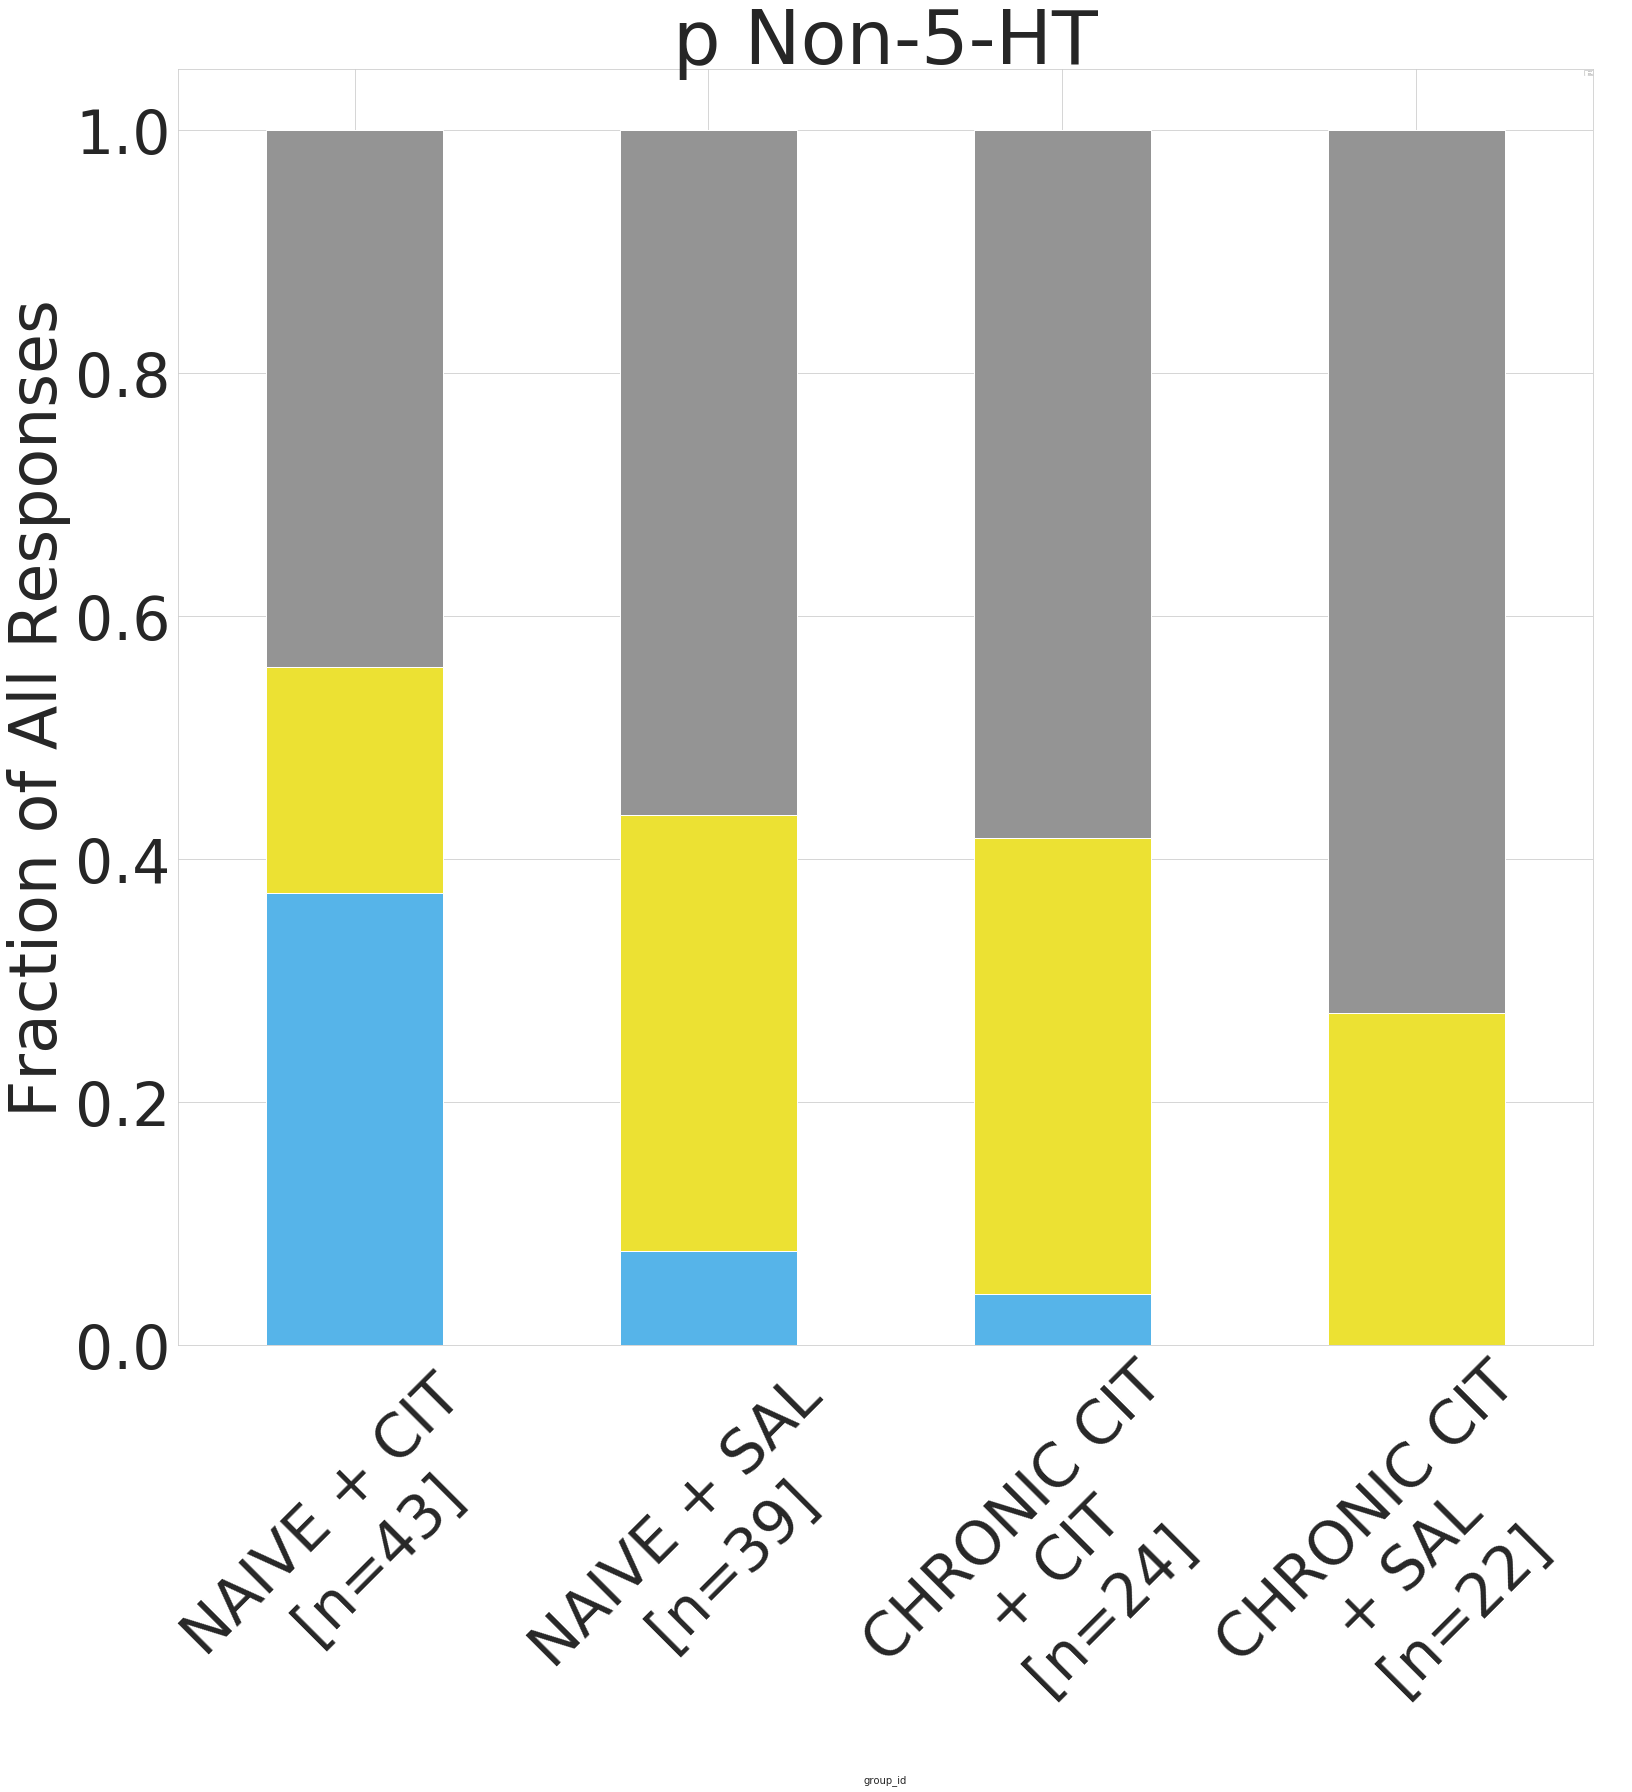

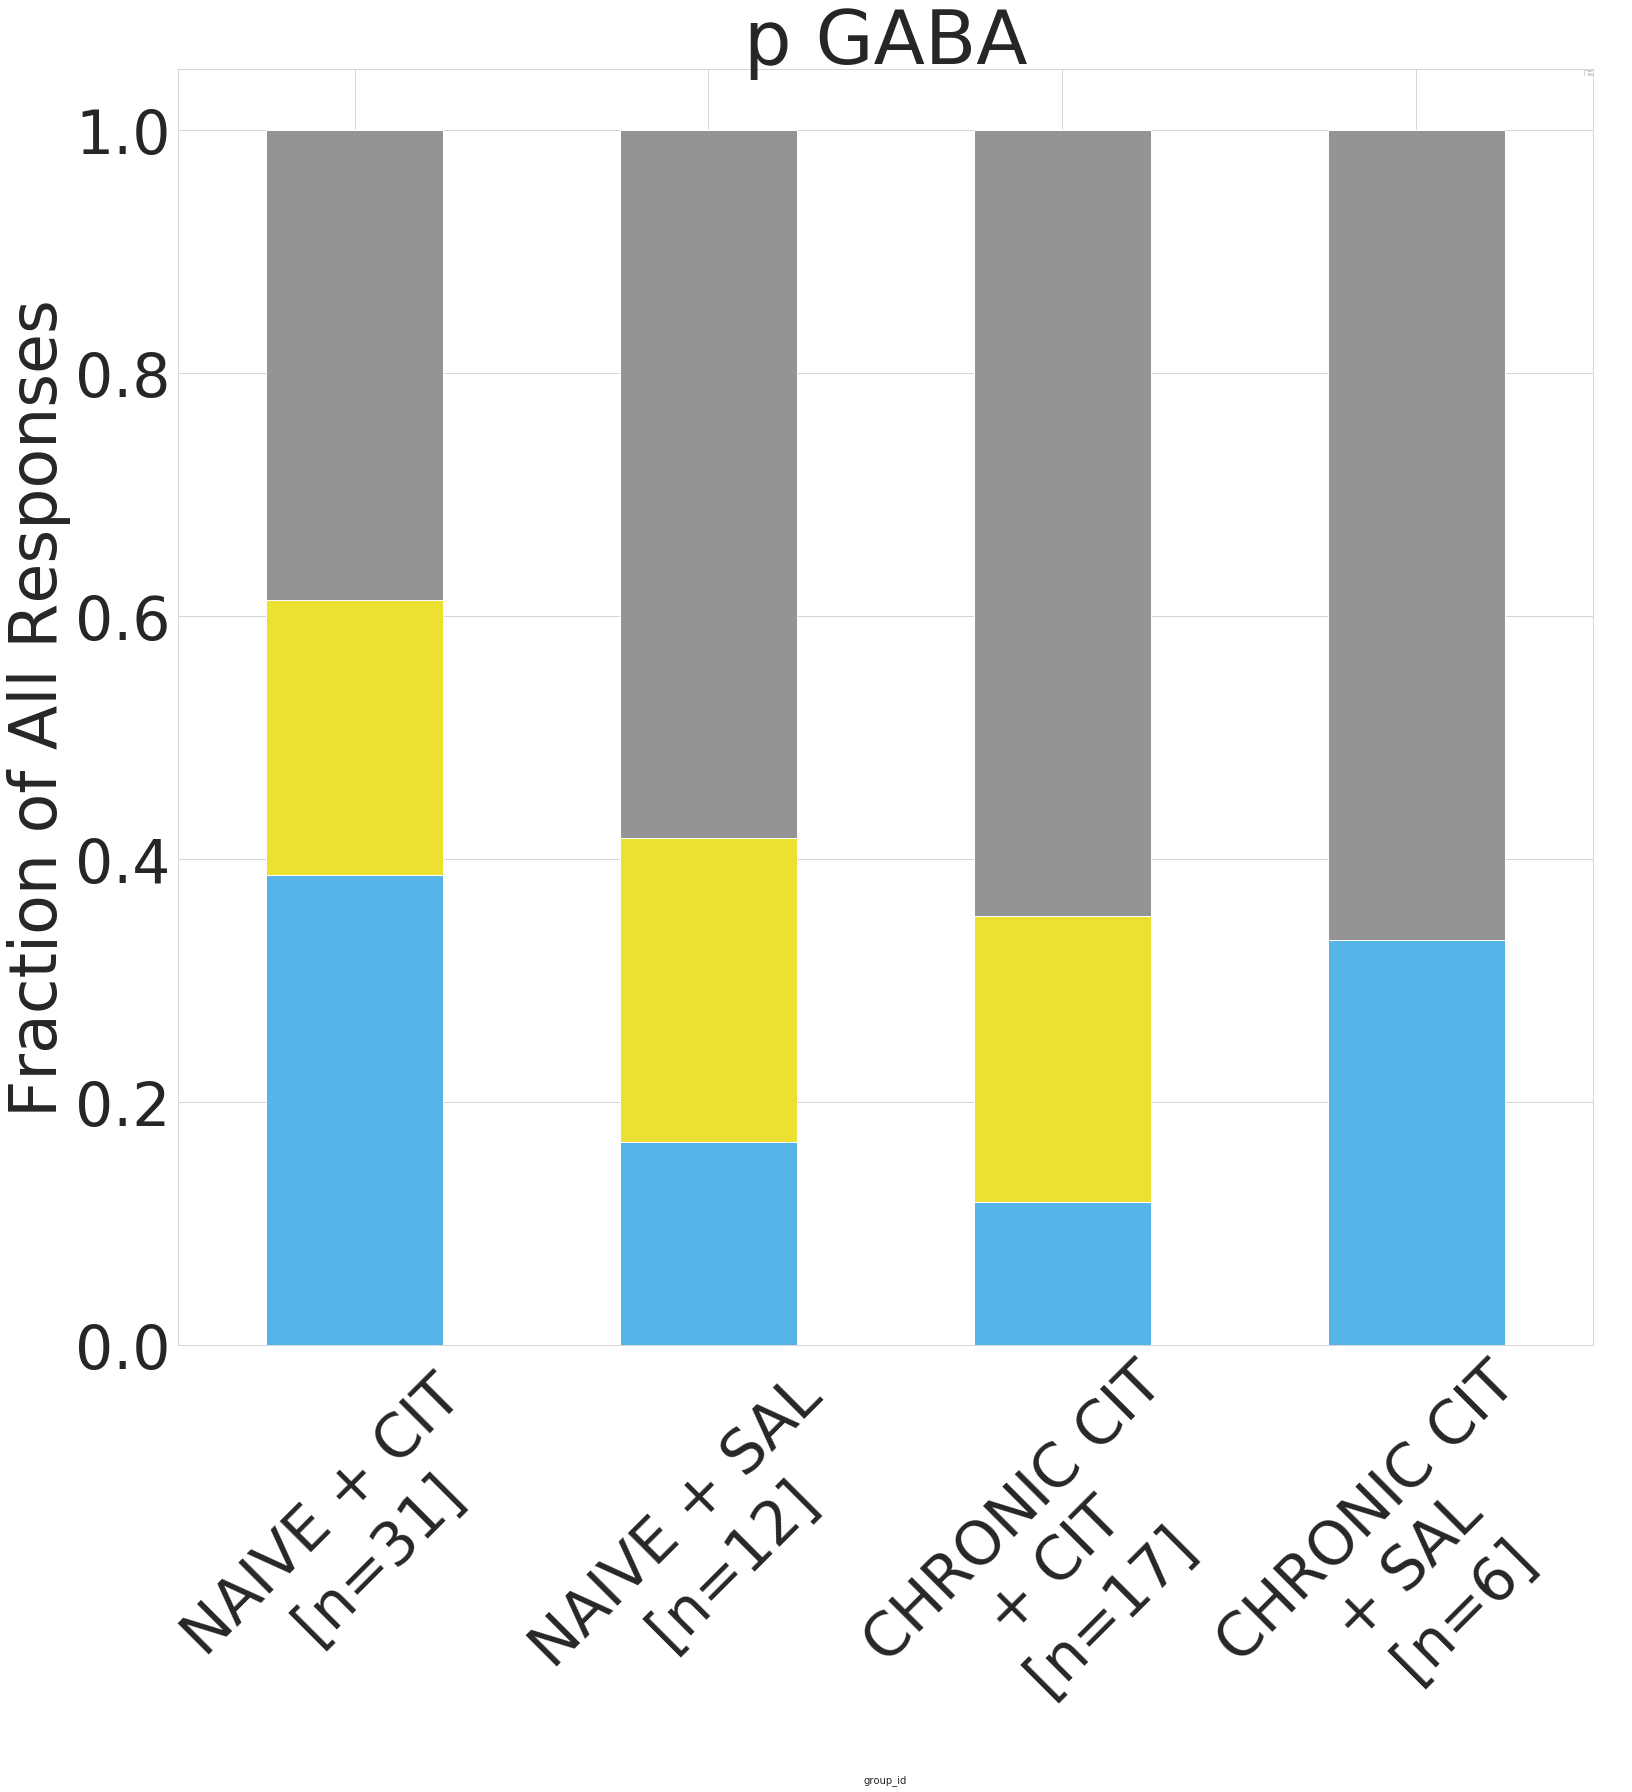

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_style('whitegrid')
save_dir = '/media/ruairi/UBUNTU/figures/bars'
exp= 'CIT_WAY'

#f, ax = plt.subplots(ncols=3, figsize=(33, 15), sharey=True)

for i, cat in enumerate(acute['label'].unique()):
    f, a = plt.subplots(figsize=(23, 25))

    cmap = sns.color_palette('colorblind', n_colors=10)[::-1]

    df1 = acute[acute['label']==cat]
    dfp = df1.groupby(['response', 'group_id']).size().reset_index().pivot(columns='response',
                                                                    index='group_id', 
                                                                    values=0).fillna(0)
    sums = dfp.apply(np.sum, axis=1).values
    dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)
    dfp.reset_index().plot(x='group_id', kind='bar', stacked=True, 
                               color=cmap, ax=a)
    a.set_title(cat, fontdict={'fontsize': 75})
    
    a.set_xticklabels([f'NAIVE + CIT \n[n={int(sums[0])}]', 
                       f'NAIVE + SAL \n[n={int(sums[1])}]',
                       f'CHRONIC CIT\n+ CIT \n[n={int(sums[2])}]',
                      f'CHRONIC CIT\n+ SAL \n[n={int(sums[3])}]'],
                    rotation=45)
    a.legend(loc=0, prop={'size':0.00001})
    a.set_ylabel('Fraction of All Responses', {'fontsize': 65})

    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(60)
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(60)
    if i == 0:
        a.legend(loc=0, prop={'size':90})
    plt.tight_layout()
    #plt.savefig(f'/home/ruairi/data/figures/talk/ALL_{cat}.png', 
#                dpi=300)

#plt.savefig('/home/ruairi/data/figures/talk/acute.png', dpi=300)

In [17]:
chronic = df[(df['group_id'].isin([3,4])) & 
         (df['response']!= 'excluded')]

In [18]:
cmap = sns.color_palette('colorblind', n_colors=10).as_hex()[::-1]

cmap = ['#56b4e9', '#949494', '#ece133']

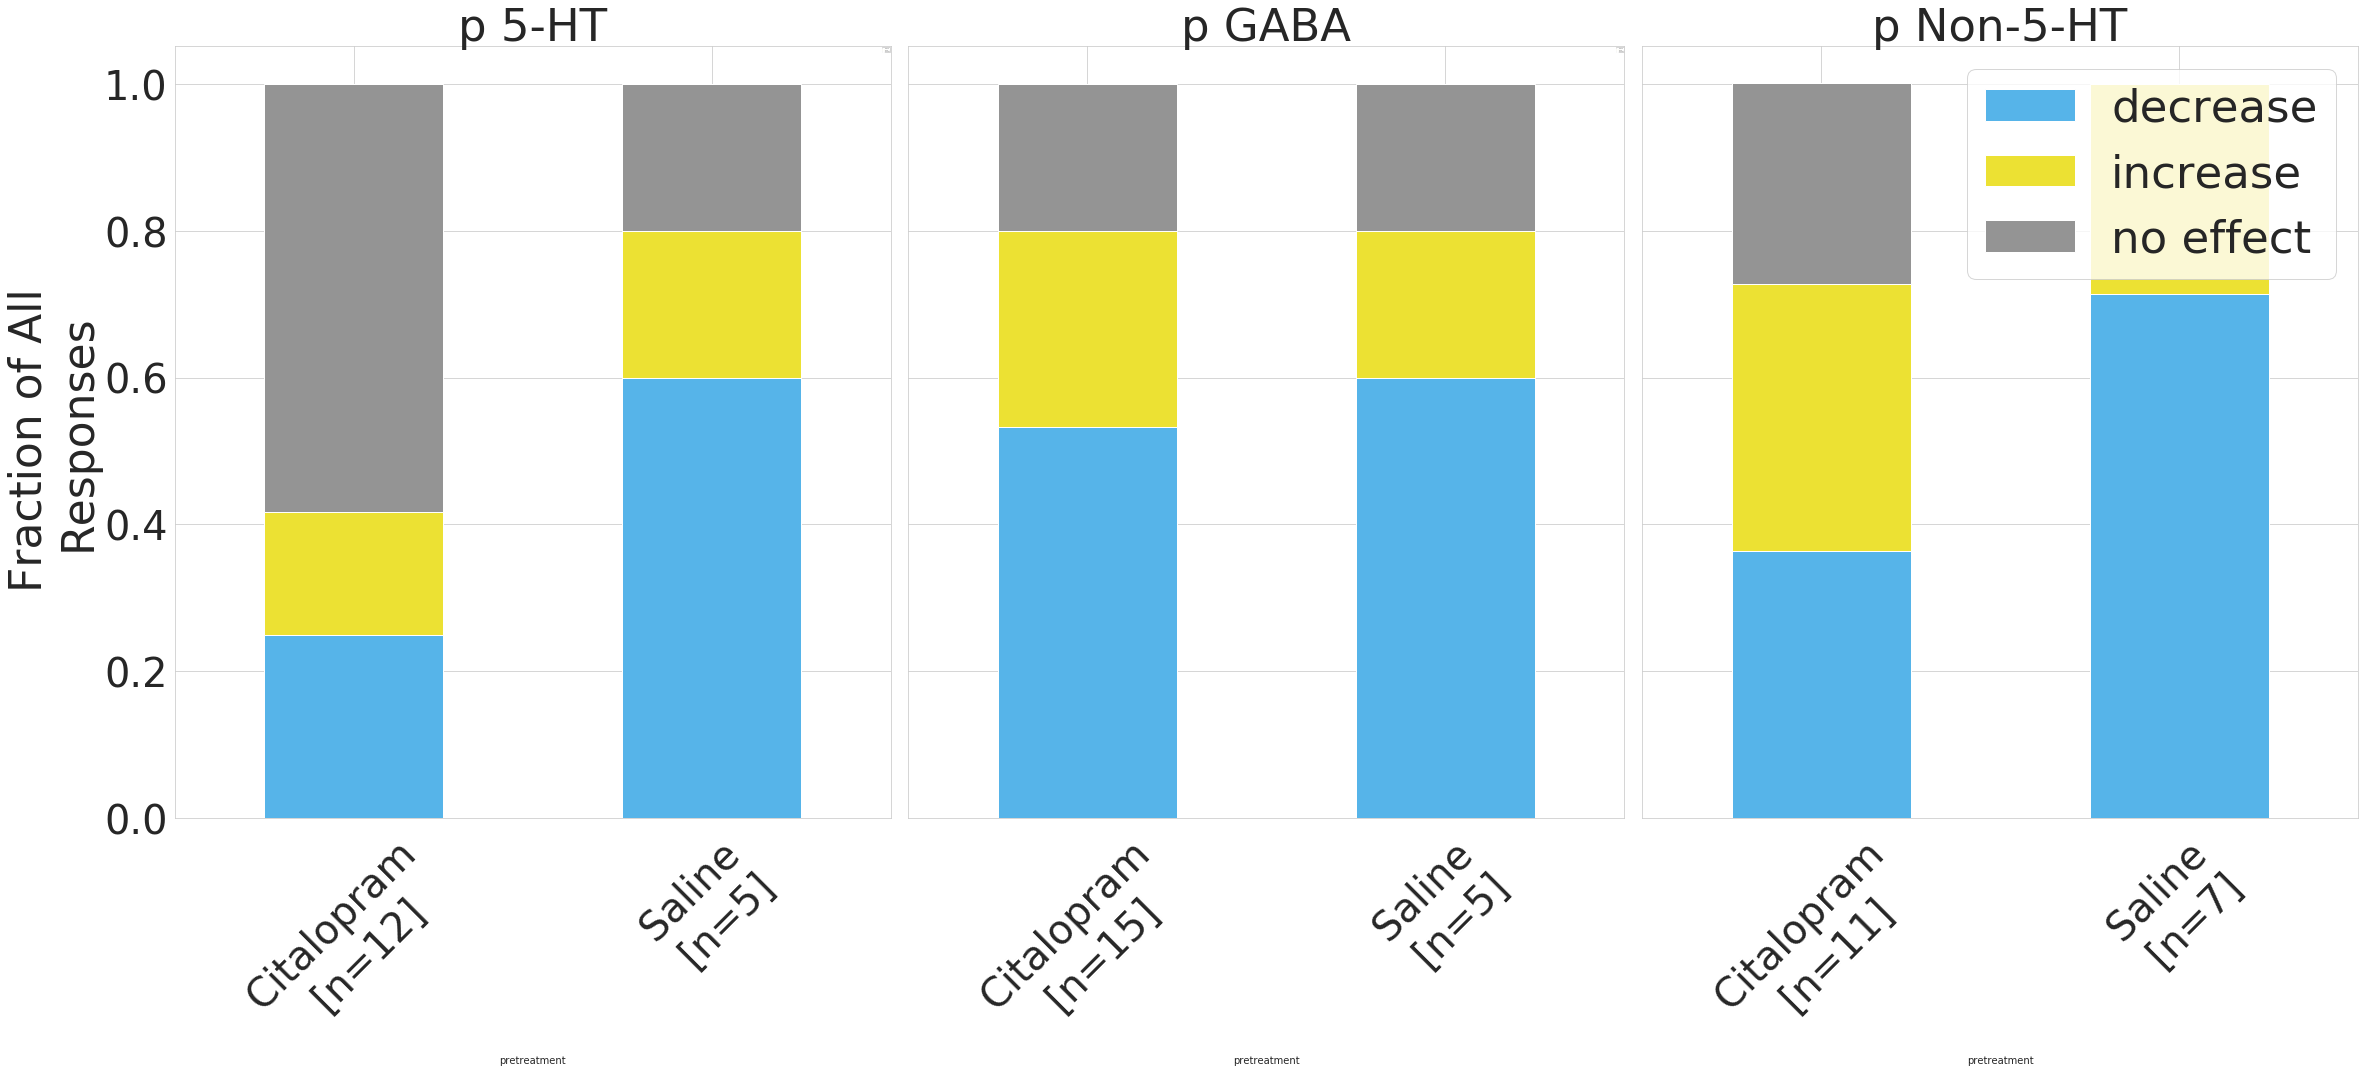

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_style('whitegrid')
save_dir = '/media/ruairi/UBUNTU/figures/bars'
exp= 'CIT_WAY'

f, ax = plt.subplots(ncols=3, figsize=(33, 15), sharey=True)

for i, cat in enumerate(chronic['label'].unique()):
    a = ax[i]

    df1 = chronic[chronic['label']==cat]
    dfp = df1.groupby(['response', 'pretreatment']).size().reset_index().pivot(columns='response',
                                                                    index='pretreatment', 
                                                                    values=0).fillna(0)
    sums = dfp.apply(np.sum, axis=1).values
    dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)
    dfp.reset_index().plot(x='pretreatment', kind='bar', stacked=True, 
                               color=cmap, ax=a)
    a.set_title(cat, fontdict={'fontsize': 45})
    
    a.set_xticklabels([f'Citalopram \n[n={int(sums[0])}]', f'Saline \n[n={int(sums[1])}]'],
                     rotation=45)
    a.legend(loc=0, prop={'size':0.0001})
    
    
    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(40)
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(40)

ax[-1].legend(loc=0, prop={'size':45})
ax[0].set_ylabel('Fraction of All \nResponses', {'fontsize': 44})
plt.tight_layout()
plt.savefig('/home/ruairi/data/figures/tmp/first_two.png', dpi=300)

In [20]:
cmap = sns.color_palette('colorblind', n_colors=10).as_hex()[::-1]

#cmap = ['#56b4e9', '#949494', '#ece133']

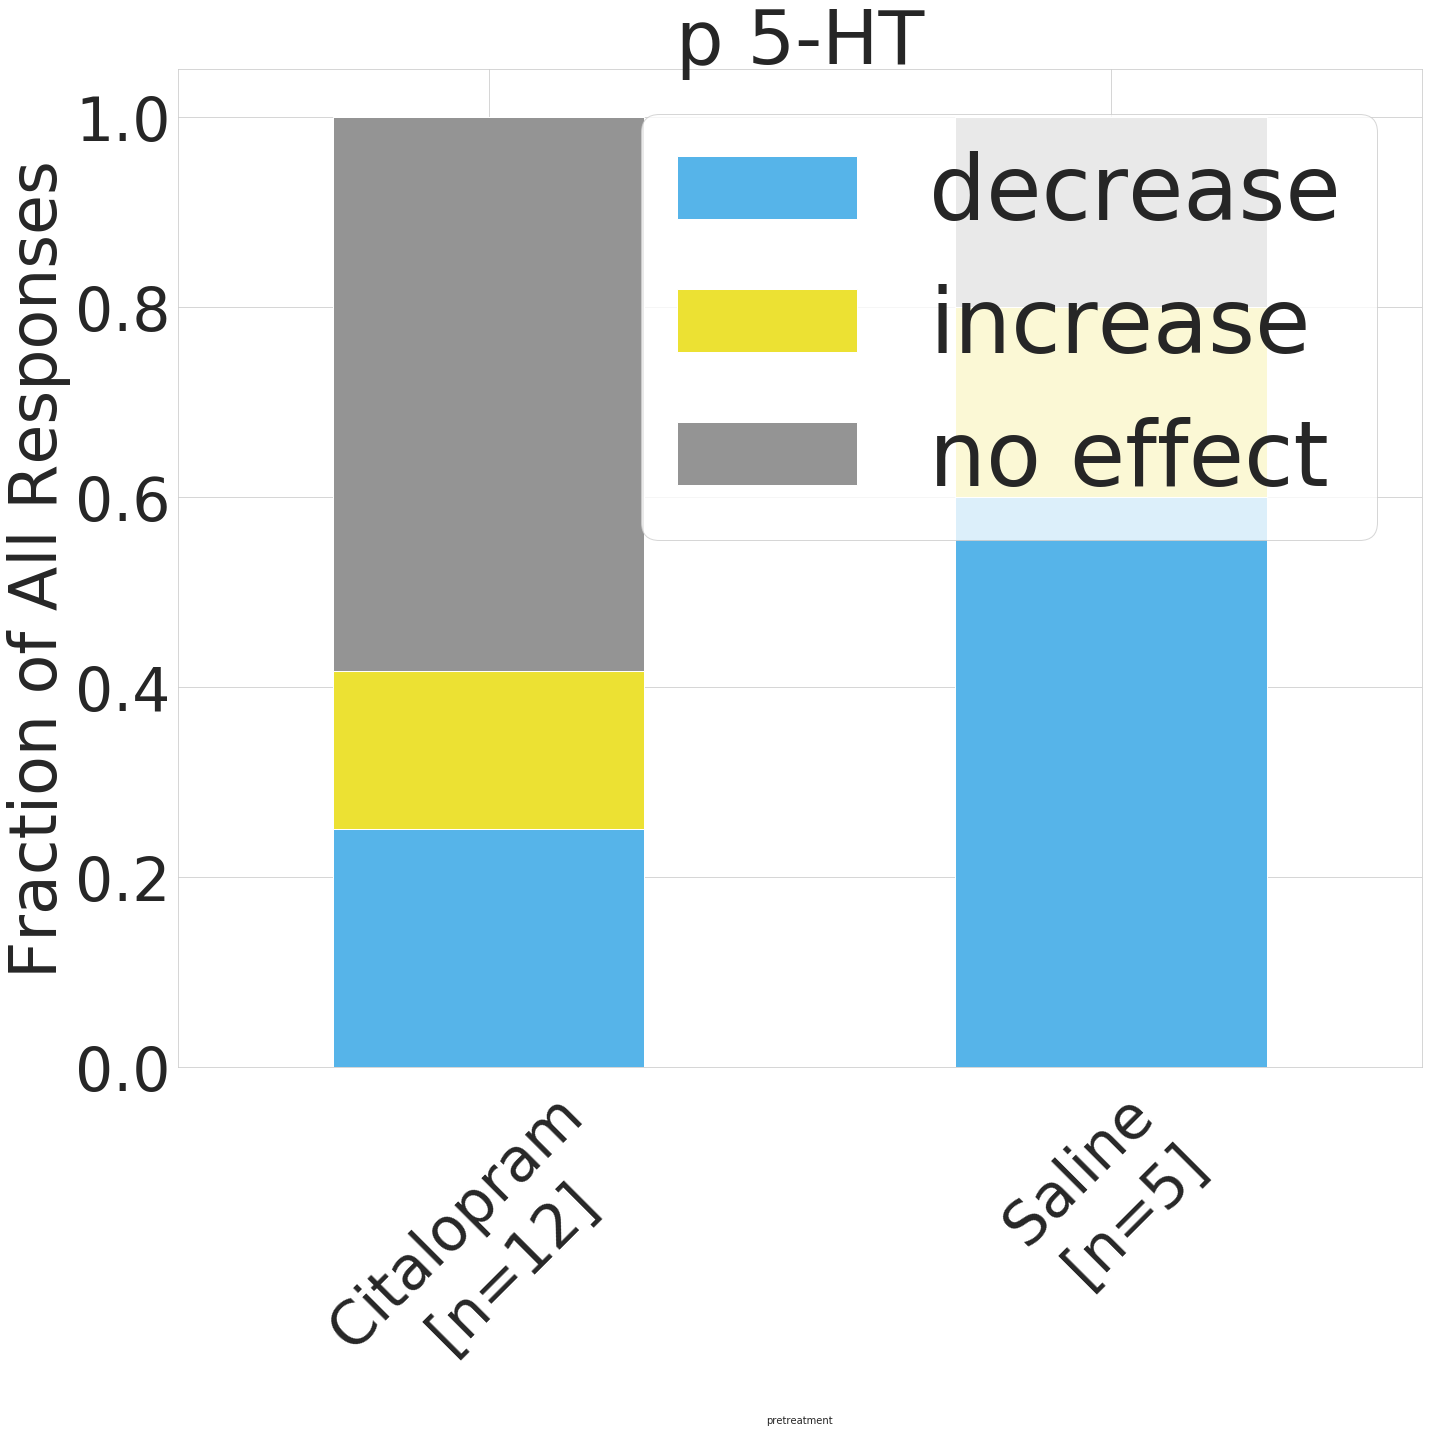

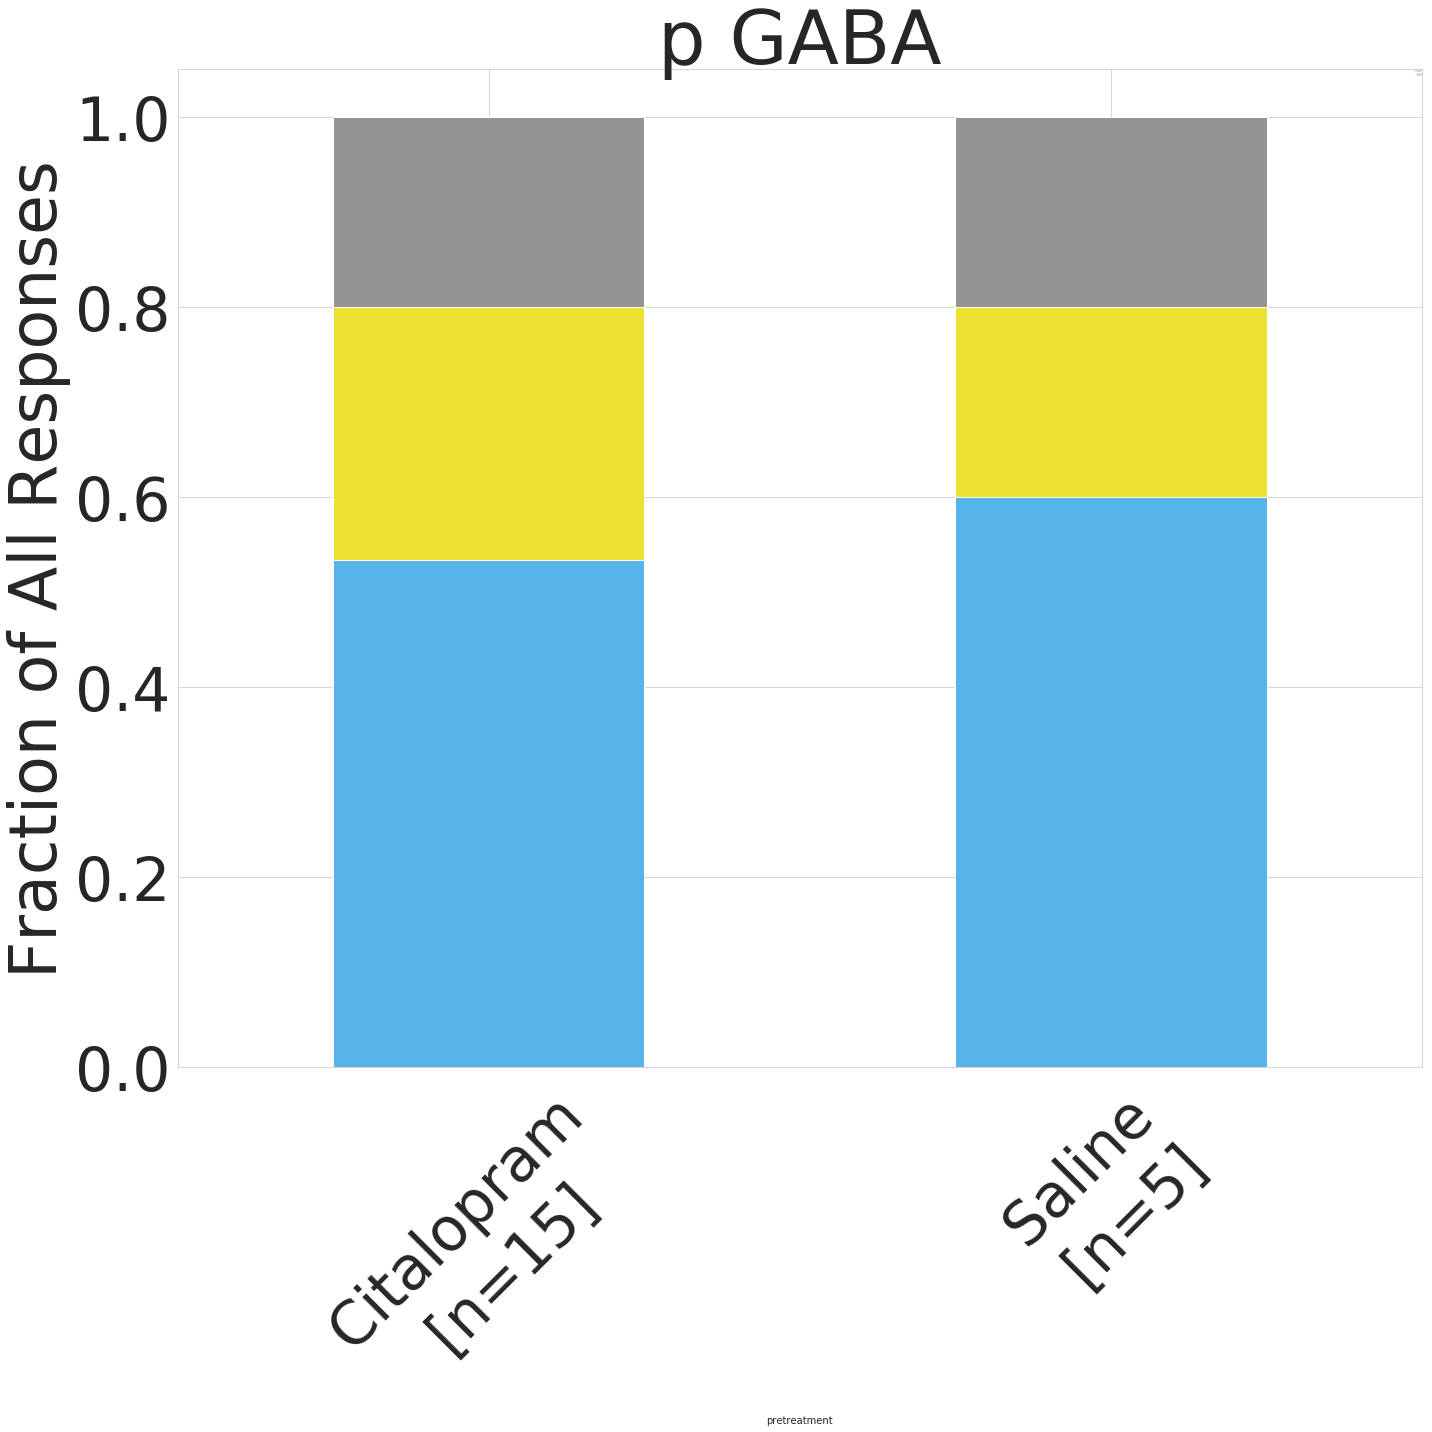

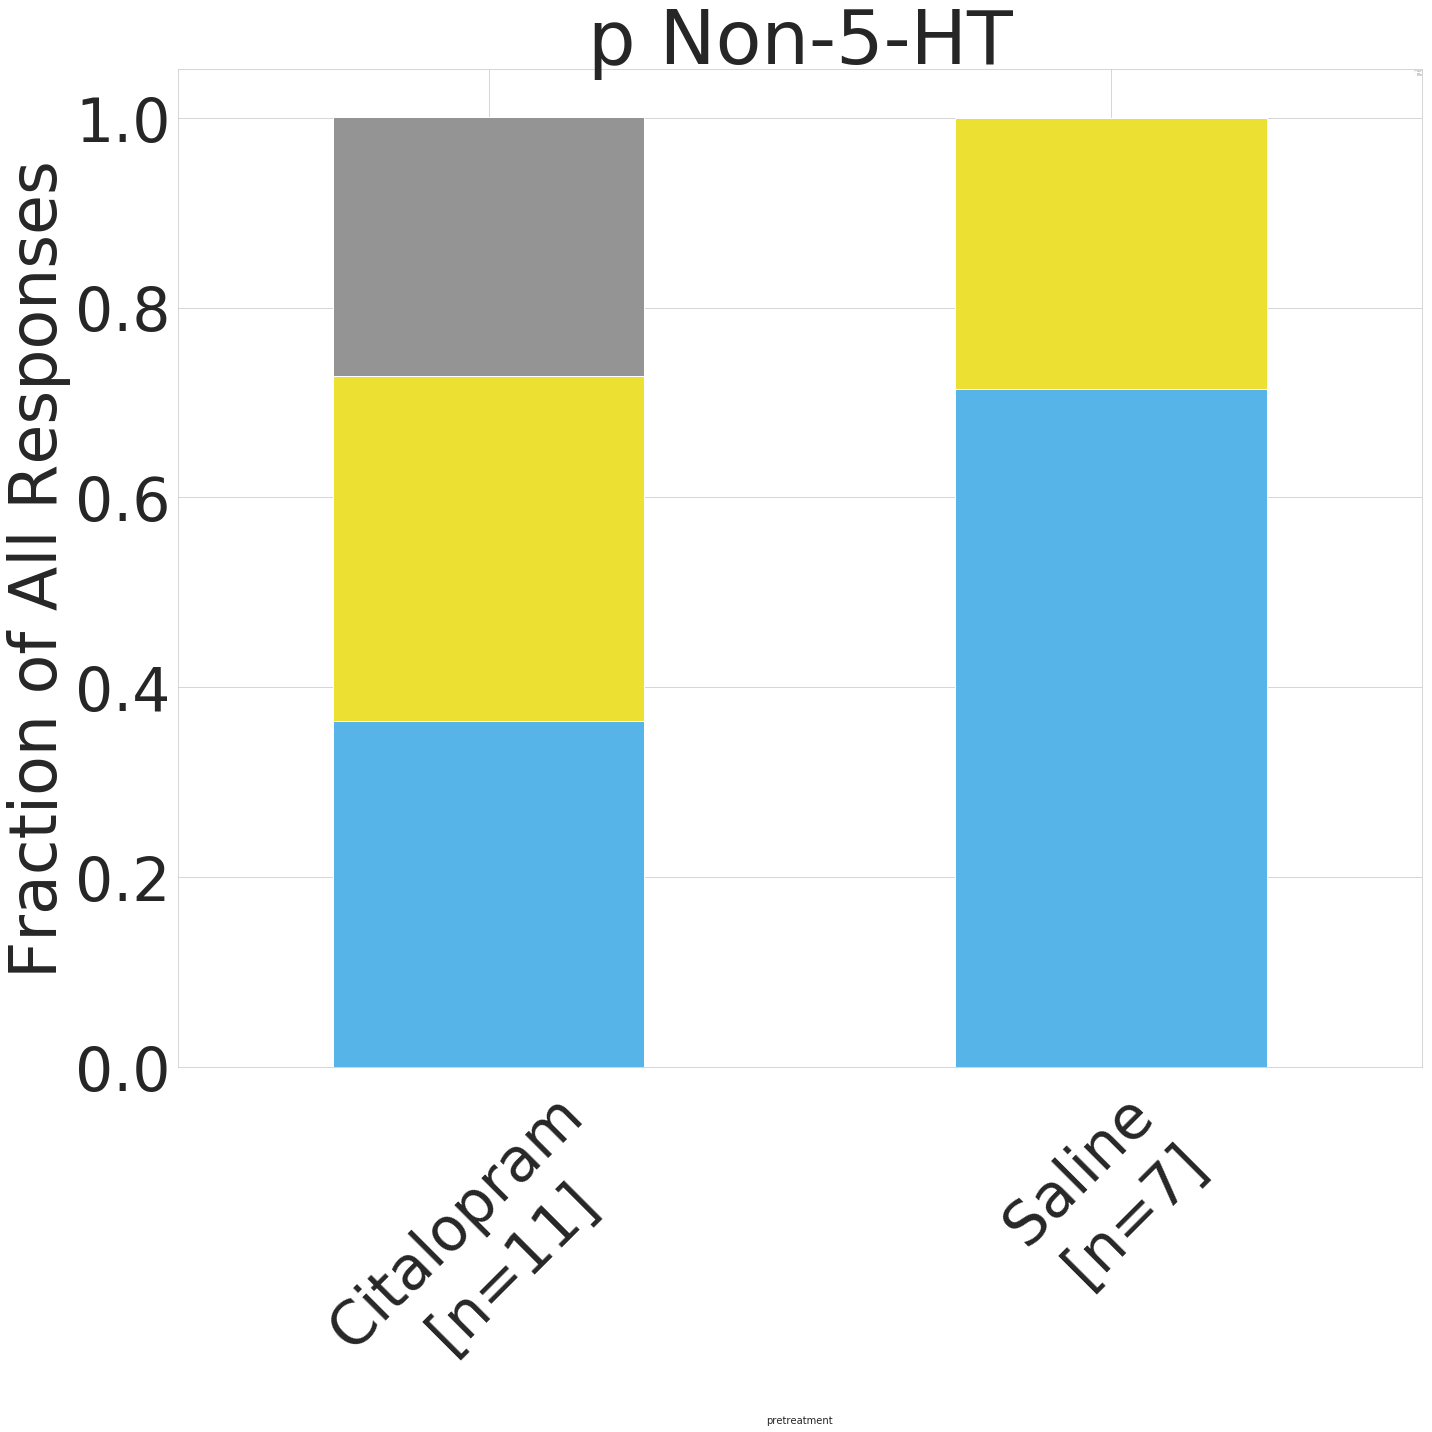

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_style('whitegrid')
save_dir = '/media/ruairi/UBUNTU/figures/bars'
exp= 'CIT_WAY'

#f, ax = plt.subplots(ncols=3, figsize=(33, 15), sharey=True)

for i, cat in enumerate(chronic['label'].unique()):
        
    f, a = plt.subplots(figsize=(20, 20))


    df1 = chronic[chronic['label']==cat]
    dfp = df1.groupby(['response', 'pretreatment']).size().reset_index().pivot(columns='response',
                                                                    index='pretreatment', 
                                                                    values=0).fillna(0)
    sums = dfp.apply(np.sum, axis=1).values
    dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)
    dfp.reset_index().plot(x='pretreatment', kind='bar', stacked=True, 
                               color=cmap, ax=a)
    a.set_title(cat, fontdict={'fontsize': 75})
    
    a.set_xticklabels([f'Citalopram \n[n={int(sums[0])}]', f'Saline \n[n={int(sums[1])}]'],
                     rotation=45)
    if i == 0:
        a.legend(loc=0, prop={'size':90})
    else:
        a.legend(loc=0, prop={'size':0.00001})
        
    a.set_ylabel('Fraction of All Responses', {'fontsize': 65})

    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(60)
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(60)
    plt.tight_layout()
    plt.savefig(f'/home/ruairi/data/figures/talk/chronic_cm{i}.png', 
                dpi=300)

#plt.savefig('/home/ruairi/data/figures/talk/acute.png', dpi=300)

In [22]:
import matplotlib.pyplot as plt


df5 = pd.merge(left=dfc[dfc['neuron_id'].isin(cit['neuron_id'].values)], 
               right=cit[['response', 'neuron_id', 'treatment']],
         how='left', on='neuron_id')

NameError: name 'cit' is not defined

In [ ]:
pal = {'Clocklike Slow Regular':'#c44e52',
'Slow Irregular':'#4c72b0',
'Fast Varied':'#55a868',
'Very Fast Regular': '#dd8452' }

In [ ]:
df5[df5['response']!='no effect'].groupby('treatment')['neuron_id'].apply(len)

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
import os

f, a = plt.subplots(figsize=(15, 8))


sns.countplot(data=df5[df5['response']!='no effect'], x='treatment', hue='hc_cluster', 
              palette=pal, ax=a)

a.set_ylabel('Count of Responding Neurons', fontdict={'fontsize':19})
a.set_xlabel('Treatment', fontdict={'fontsize':19})
a.set_xticklabels(['Citalopram [n=74]', 'Saline [n=15]'], fontdict={'fontsize':19})
a.set_yticklabels(labels=[0, 5, 10, 15, 20, 25, 30, 35], fontdict={'fontsize':19})
a.legend(loc=0, prop={'size': 20})


save_dir = '/media/ruairi/UBUNTU/figures/new_bars'
# plt.savefig(os.path.join(save_dir, 'cit.png'), dpi=300)

In [ ]:
sert = df[(df['experiment_name'] == 'SERT_DREADD') & 
         (df['response']!= 'excluded')]

In [ ]:
sert[sert['response']=='increase'].groupby('virus').apply(len)

In [ ]:
s_d = sert[sert['virus']=='hM3Dq']
s_c = sert[sert['virus']=='mCherry']

In [ ]:
s_d.groupby('response').apply(lambda x: len(x)/ len(s_d))

In [ ]:
s_c.groupby('response').apply(lambda x: len(x)/ len(s_c))

In [ ]:
# f, a = plt.subplots(figsize=(30, 30))

df1 = sert[sert['response']=='increase']
dfp = df1.groupby(['hc_cluster', 'virus']).size().reset_index().pivot(columns='hc_cluster',
                                                                    index='virus', 
                                                                    values=0).fillna(0)
dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)


In [ ]:
dfp

In [ ]:
pal2 = ['#c44e52','#55a868',  '#4c72b0', '#dd8452']

In [ ]:
df1.groupby('virus').apply(len)

In [ ]:
f, a = plt.subplots(figsize=(10, 10))

dfp.reset_index().plot(x='virus', kind='bar', stacked=True, 
                       color=pal2, ax=a)
a.set_xticklabels(['hM3Dq\n[n=24]', 'mCherry\n[n=21]'], 
                  fontdict={'fontsize':20}, rotation=0)
a.set_yticklabels([0,0.2, 0.4, 0.6, 0.8, 1], fontdict={'fontsize':20})

a.legend(loc=1, prop={'size': 20})
a.set_ylabel('Fraction Total Inhibited Neurons', 
             fontdict={'fontsize': 25})

a.set_xlabel('Virus', fontdict={'fontsize': 25})
plt.savefig(os.path.join(save_dir, 'sert_decrease.png'), dpi=300)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

exp = 'sert_dreadd'

for cat in sert['hc_cluster'].unique():
    f, a = plt.subplots(figsize=(30, 30))

    cmap = sns.color_palette('colorblind', n_colors=10)[::-1]

    df1 = sert[sert['hc_cluster']==cat]
    dfp = df1.groupby(['response', 'virus']).size().reset_index().pivot(columns='response',
                                                                    index='virus', 
                                                                    values=0).fillna(0)
    sums = dfp.apply(np.sum, axis=1).values
    dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)
    dfp.reset_index().plot(x='virus', kind='bar', stacked=True, 
                               color=cmap, ax=a)
    a.set_title(cat, fontdict={'fontsize': 70})
    a.set_xticklabels([f'hM3Dq [n={sums[0]}]', f'mCherry [n={sums[1]}]'])
    plt.xticks(rotation=0)
    a.legend(loc=0, prop={'size': 70})
    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(60)
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(60)
    plt.ylabel('Fraction Total', fontdict={'fontsize': 90})
    plt.savefig(os.path.join(save_dir, f'{exp}_{cat}.png'), dpi=300)

In [ ]:
df6[df6['response']!='no effect'].groupby('virus')['neuron_id'].apply(len)

In [ ]:
df6[df6['response']=='increase'].groupby(['virus'])['neuron_id'].apply(len)

In [ ]:
df6 = pd.merge(left=dfc[dfc['neuron_id'].isin(sert['neuron_id'].values)], 
               right=sert[['response', 'neuron_id', 'virus']],
         how='left', on='neuron_id')


f, a = plt.subplots(figsize=(15, 8))

sns.countplot(data=df6[df6['response']=='increase'], 
              x='virus', 
              hue='hc_cluster', palette=pal, 
              hue_order=['Clocklike Slow Regular', 'Slow Irregular', 'Fast Varied'],
             ax=a)


a.set_ylabel('Count of Activated Neurons', fontdict={'fontsize':19})
a.set_xlabel('Virus', fontdict={'fontsize':19})
a.set_xticklabels(['hM3Dq [n=19]', 'mCherry [n=12]'], fontdict={'fontsize':19})
a.set_yticklabels(labels=[0, 2, 4, 6, 8, 10, 12], fontdict={'fontsize':19})
a.legend(loc=0, prop={'size': 20})


save_dir = '/media/ruairi/UBUNTU/figures/new_bars'
plt.savefig(os.path.join(save_dir, 'sert.png'), dpi=300)

In [ ]:
gat = df[(df['experiment_name'] == 'GAT_DREADD') & 
         (df['response']!= 'excluded')]

In [ ]:
df1.groupby('virus').apply(len)

In [ ]:
df1 = gat[gat['response']=='increase']
dfp = df1.groupby(['hc_cluster', 'virus']).size().reset_index().pivot(columns='hc_cluster',
                                                                    index='virus', 
                                                                    values=0).fillna(0)
dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)

In [ ]:
df1 = gat[gat['response']=='increase']
dfp = df1.groupby(['hc_cluster', 'virus']).size().reset_index().pivot(columns='hc_cluster',
                                                                    index='virus', 
                                                                    values=0).fillna(0)
dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)
dfp

In [ ]:
gat.groupby('virus').apply(len)

In [ ]:
g_d = gat[gat['virus']=='hM3Dq']
g_c = gat[gat['virus']=='mCherry']


In [ ]:
g_d.groupby('response').apply(lambda x: len(x)/ len(g_d) * 100)

In [ ]:
g_c.groupby('response').apply(lambda x: len(x)/ len(g_c) * 100)

In [ ]:
f, a = plt.subplots(figsize=(10, 10))

dfp.reset_index().plot(x='virus', kind='bar', stacked=True, 
                       color=pal2[::2], ax=a)
a.set_xticklabels(['hM3Dq\n[n=10]', 'mCherry\n[n=4]'], 
                  fontdict={'fontsize':20}, rotation=0)
a.set_yticklabels([0,0.2, 0.4, 0.6, 0.8, 1], fontdict={'fontsize':20})

a.legend(loc=0, prop={'size': 20})
a.set_ylabel('Fraction Total Inhibited Neurons', 
             fontdict={'fontsize': 25})

a.set_xlabel('Virus', fontdict={'fontsize': 25})
plt.savefig(os.path.join(save_dir, 'gat_decrease.png'), dpi=300)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

exp = 'gat_dreadd'

for cat in sert['hc_cluster'].unique():
    f, a = plt.subplots(figsize=(30, 30))

    cmap = sns.color_palette('colorblind', n_colors=10)[::-1]

    df1 = gat[gat['hc_cluster']==cat]
    dfp = df1.groupby(['response', 'virus']).size().reset_index().pivot(columns='response',
                                                                    index='virus', 
                                                                    values=0).fillna(0)
    sums = dfp.apply(np.sum, axis=1).values
    dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)
    dfp.reset_index().plot(x='virus', kind='bar', stacked=True, 
                               color=cmap, ax=a)
    a.set_title(cat, fontdict={'fontsize': 70})
    a.set_xticklabels([f'hM3Dq [n={sums[0]}]', f'mCherry [n={sums[1]}]'])
    plt.xticks(rotation=0)
    a.legend(loc=0, prop={'size': 70})
    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(60)
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(60)
    plt.ylabel('Fraction Total', fontdict={'fontsize': 90})
    plt.savefig(os.path.join(save_dir, f'{exp}_{cat}.png'), dpi=300)

In [ ]:
df6 = pd.merge(left=dfc[dfc['neuron_id'].isin(gat['neuron_id'].values)], 
               right=gat[['response', 'neuron_id', 'virus']],
         how='left', on='neuron_id')

f, a = plt.subplots(figsize=(15, 8))

sns.countplot(data=df6[df6['response']!='no effect'][::-1], 
              x='virus', 
              hue='hc_cluster', palette=pal, 
              ax=a)


a.set_ylabel('Count of Responding Neurons', fontdict={'fontsize':19})
a.set_xlabel('Virus', fontdict={'fontsize':19})
a.set_xticklabels(['hM3Dq [n=17]', 'mCherry [n=10]'], fontdict={'fontsize':19})
a.set_yticklabels(labels=[0, 2, 4, 6, 8, 10, 12], fontdict={'fontsize':19})
a.legend(loc=0, prop={'size': 20})


save_dir = '/media/ruairi/UBUNTU/figures/new_bars'
plt.savefig(os.path.join(save_dir, 'gat.png'), dpi=300)

In [ ]:
df6[df6['response']!='no effect'].groupby('virus')['neuron_id'].apply(len)

In [110]:
df[df['neuron_id']==282]

,neuron_id,response,treatment,virus,label,group_id,pretreatment
93314,282,no effect,CIT,NaN,p GABA,3,CIT
